This file is for analyzing the DockQ results.

First we look at histograms of the Capri classes.

In [37]:
import pandas as pd
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib.patches import Patch, Rectangle
import matplotlib.colors as mcolors
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from pandas.plotting import table
import scienceplots

In [38]:
# Read in the data
ai1 = pd.read_csv('./project_pipeline/data/ai_dockq_results.csv').astype('object')
md = pd.read_csv('./project_pipeline/data/md_dockq_results.csv').astype('object')

plt.style.use('science')

In [39]:
# Get the hex codes for the colors so we can assign them to categories
pal = sns.color_palette('Set1')
print(pal.as_hex())

# Set the color palette. Our categories are "Single Domain", "Two-Domain", and "Autoinhibitory"
colors = {'Single Domain': pal[0], 'Two-Domain': pal[1], 'Autoinhibitory': pal[2], 'Autoinhibitory (Active)': pal[6], 'Autoinhibitory (Autoinhibited)': pal[5], 
          'Full': pal[3], 'Clusters': pal[7], 'Two-State': pal[4]}
pal.as_hex()

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

In [40]:
# Subset autoinhibitory proteins to only those that have a labeled state and conformation
cl3 = pd.read_csv('./project_pipeline/data/classified_files.tsv', sep='\t').astype('object')

ai = pd.merge(ai1, cl3, on=['uniprot', 'pdb'], how='left')
print(len(ai))

ai = ai.dropna(subset=['state', 'conformation'])

print(len(ai))
ai.head()

895
632


,uniprot,pdb,fnat,fnat_correct,fnat_total,fnonnat,fnonnat_nnative,fnonnat_model,irms,lrms,...,complex_rmsd,percent_region_1,percent_region_2,2_aligned,2_comp,state,conformation,organism,date,notes
0,P28482,4qp6,0.913,63,69,0.222,18,81,1.644,3.298,...,1.856,75.0,98.490566,1.387,3.309,Active,Closed,Homo sapiens,['2014-06-22'],NaN
1,P62826,5uwh,1.0,5,5,0.286,2,7,1.03,40.342,...,15.898,86.842105,100.0,0.995,40.559,Active,Closed,Homo sapiens,['2017-02-21'],NaN
3,P28482,6gjb,0.8,64,80,0.439,50,114,2.574,5.796,...,2.2,100.0,99.622642,1.198,6.652,Autoinhibited,Closed,Homo sapiens,['2018-05-16'],NaN
4,P28482,7nr3,0.833,60,72,0.455,50,110,2.533,5.722,...,2.165,100.0,99.622642,1.229,6.646,Autoinhibited,Closed,Homo sapiens,['2021-03-02'],NaN
5,P62826,7mo3,0.6,3,5,0.957,67,70,3.951,63.652,...,24.165,84.210526,99.375,4.591,62.371,Autoinhibited,Closed,Homo sapiens,['2021-05-01'],NaN


In [41]:
md['type'] = 'Two-Domain'
md.head()

,uniprot,pdb,fnat,fnat_correct,fnat_total,fnonnat,fnonnat_nnative,fnonnat_model,irms,lrms,dockq,capri,type
0,A0A0A0V031,5ups,0.929,130,140,0.097,14,144,0.426,0.592,0.95,High,Two-Domain
1,P59676,1pyy,0.981,101,103,0.082,9,110,0.448,2.013,0.949,High,Two-Domain
2,D9N168,8scl,0.981,104,106,0.028,3,107,0.291,0.906,0.978,High,Two-Domain
3,P01730,1wio,0.876,99,113,0.1,11,110,0.823,2.176,0.861,High,Two-Domain
4,P97784,6kx4,0.924,194,210,0.072,15,209,0.453,0.475,0.946,High,Two-Domain


In [42]:
# Let's merge together the autoinhibitory and multi-domain dataframes so we can plot them together.

ai['type'] = 'Autoinhibitory'

ai_sub = ai[['uniprot', 'pdb', 'fnat', 'fnat_correct', 'fnat_total', 'fnonnat',
       'fnonnat_nnative', 'fnonnat_model', 'irms', 'lrms', 'dockq', 'capri',
       'type']]

plot = pd.concat([ai_sub, md], ignore_index=True)
plot.head()

,uniprot,pdb,fnat,fnat_correct,fnat_total,fnonnat,fnonnat_nnative,fnonnat_model,irms,lrms,dockq,capri,type
0,P28482,4qp6,0.913,63,69,0.222,18,81,1.644,3.298,0.745,Medium,Autoinhibitory
1,P62826,5uwh,1.0,5,5,0.286,2,7,1.03,40.342,0.574,Medium,Autoinhibitory
2,P28482,6gjb,0.8,64,80,0.439,50,114,2.574,5.796,0.579,Medium,Autoinhibitory
3,P28482,7nr3,0.833,60,72,0.455,50,110,2.533,5.722,0.594,Medium,Autoinhibitory
4,P62826,7mo3,0.6,3,5,0.957,67,70,3.951,63.652,0.248,Acceptable,Autoinhibitory


## Frequencies of Capri Classes

/tmp/ipykernel_1708034/1294467110.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/tmp/ipykernel_1708034/1294467110.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


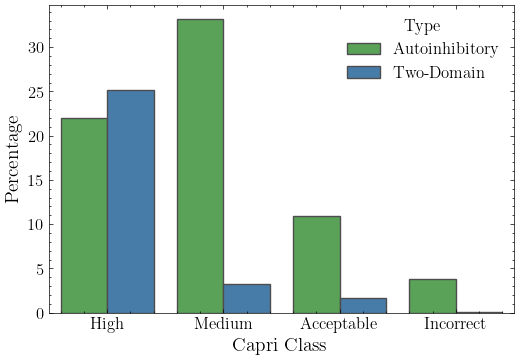

In [43]:
# Make the capri class categorical
plot['capri'] = pd.Categorical(plot['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

# Make histograms of both
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Autoinhibitory DockQ
sns.countplot(data=plot, x='capri', hue='type', ax=ax, palette=colors, edgecolor='.3', stat='percent')
ax.set_xlabel('Capri Class', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(title='Type', fontsize=12, title_fontsize=12)

plt.savefig('./project_pipeline/data/figures/dockq_histograms.png', dpi=300)

## Distributions of Fnat, Fnonnat, irms, and LRMS

In [44]:
# Concatenate dataframes with classifications
df = pd.concat([ai, md])

In [45]:
types = df['type'].unique()

print(len(types))

2


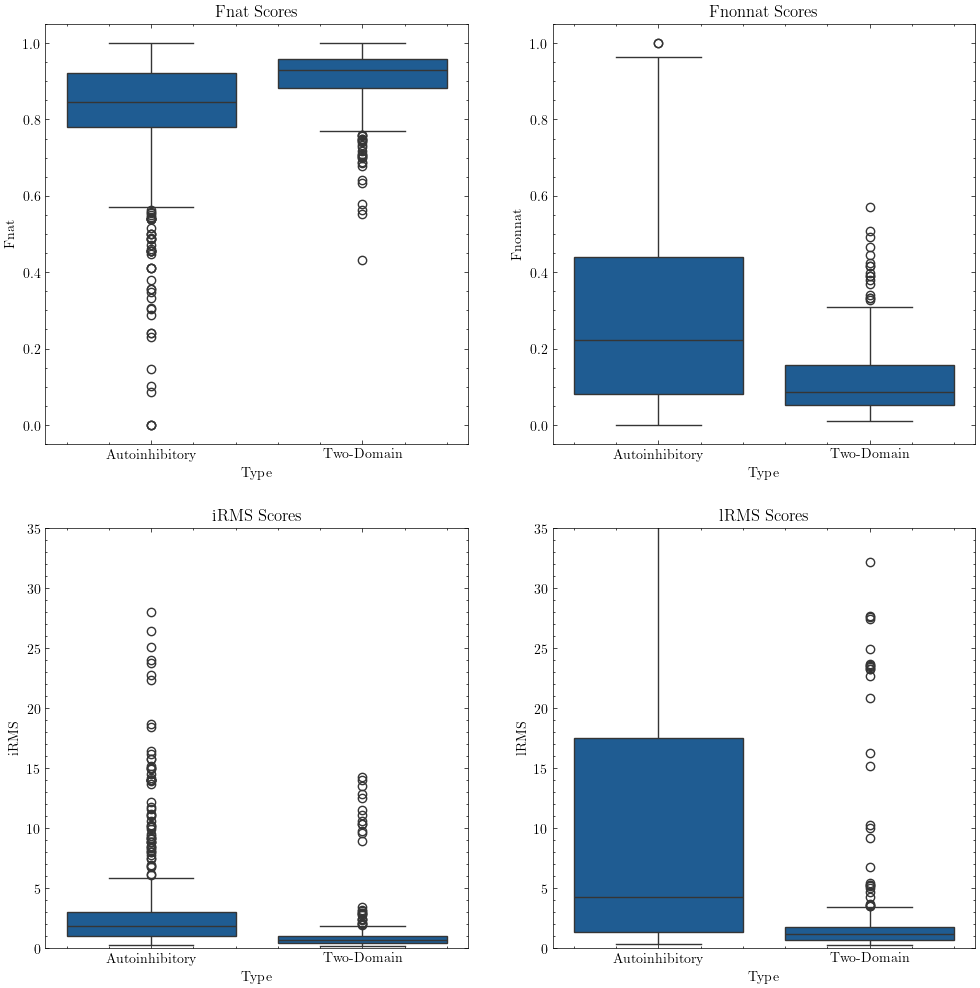

In [46]:
# Make boxplots of the four different scores
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Fnat
sns.boxplot(data=df, x='type', y='fnat', ax=ax[0, 0])
ax[0, 0].set_title('Fnat Scores')
ax[0, 0].set_ylabel('Fnat')
ax[0, 0].set_xlabel('Type')

# Fnonnat
sns.boxplot(data=df, x='type', y='fnonnat', ax=ax[0, 1])
ax[0, 1].set_title('Fnonnat Scores')
ax[0, 1].set_ylabel('Fnonnat')
ax[0, 1].set_xlabel('Type')

# iRMS
sns.boxplot(data=df, x='type', y='irms', ax=ax[1, 0])
ax[1, 0].set_title('iRMS Scores')
ax[1, 0].set_ylabel('iRMS')
ax[1, 0].set_xlabel('Type')
ax[1, 0].set_ylim(0, 35)
# lRMS
sns.boxplot(data=df, x='type', y='lrms', ax=ax[1, 1])
ax[1, 1].set_title('lRMS Scores')
ax[1, 1].set_ylabel('lRMS')
ax[1, 1].set_xlabel('Type')
ax[1, 1].set_ylim(0, 35)


# # Annotate statistical significance
# pairs = ['Autoinhibitory' 'Multi-Domain']
# order = ['Autoinhibitory', 'Multi-Domain']
# annotator = Annotator(ax[1, 1], pairs, data=df, x='type', y='lrms', order=order, hue='type')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/dockq_boxplots.png', dpi=300)


## Capri Classes for Two-State Proteins

In [47]:
# Get two-state proteins
twodf = pd.read_csv('./project_pipeline/data/two_states.tsv', sep='\t').astype('object')
twolist = twodf['uniprot'].unique().tolist()

# Subset dataframe
two = ai[ai['uniprot'].isin(twolist)].reset_index(drop=True)

# Concatenate dataframes with classifications
two['type'] = 'Two-State'

# Make capri classes categorical for two-state
two['capri'] = pd.Categorical(two['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

two_sub = two[['uniprot', 'pdb', 'fnat', 'fnat_correct', 'fnat_total', 'fnonnat',
       'fnonnat_nnative', 'fnonnat_model', 'irms', 'lrms', 'dockq', 'capri',
       'type']]

df2 = pd.concat([two_sub, md])
print(len(two))
print(len(twolist))

df2['capri'] = pd.Categorical(df2['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

278
18


/tmp/ipykernel_1708034/2704900828.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
/tmp/ipykernel_1708034/2704900828.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


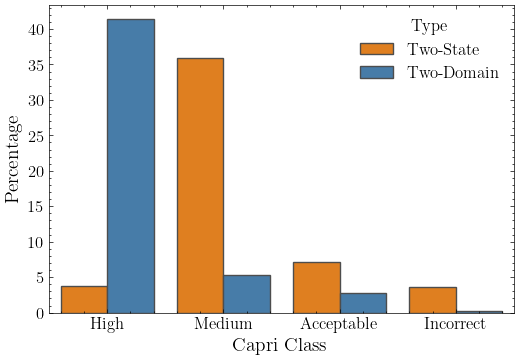

In [48]:
# Make histograms of both
fig, ax = plt.subplots(1, 1, figsize=(6, 4))

# Autoinhibitory DockQ
sns.countplot(data=df2, x='capri', hue='type', ax=ax, palette=colors, edgecolor='.3', stat='percent')
ax.set_xlabel('Capri Class', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(title='Type', fontsize=12, title_fontsize=12)

plt.savefig('./project_pipeline/data/figures/twoState_dockq_histograms.png', dpi=300)

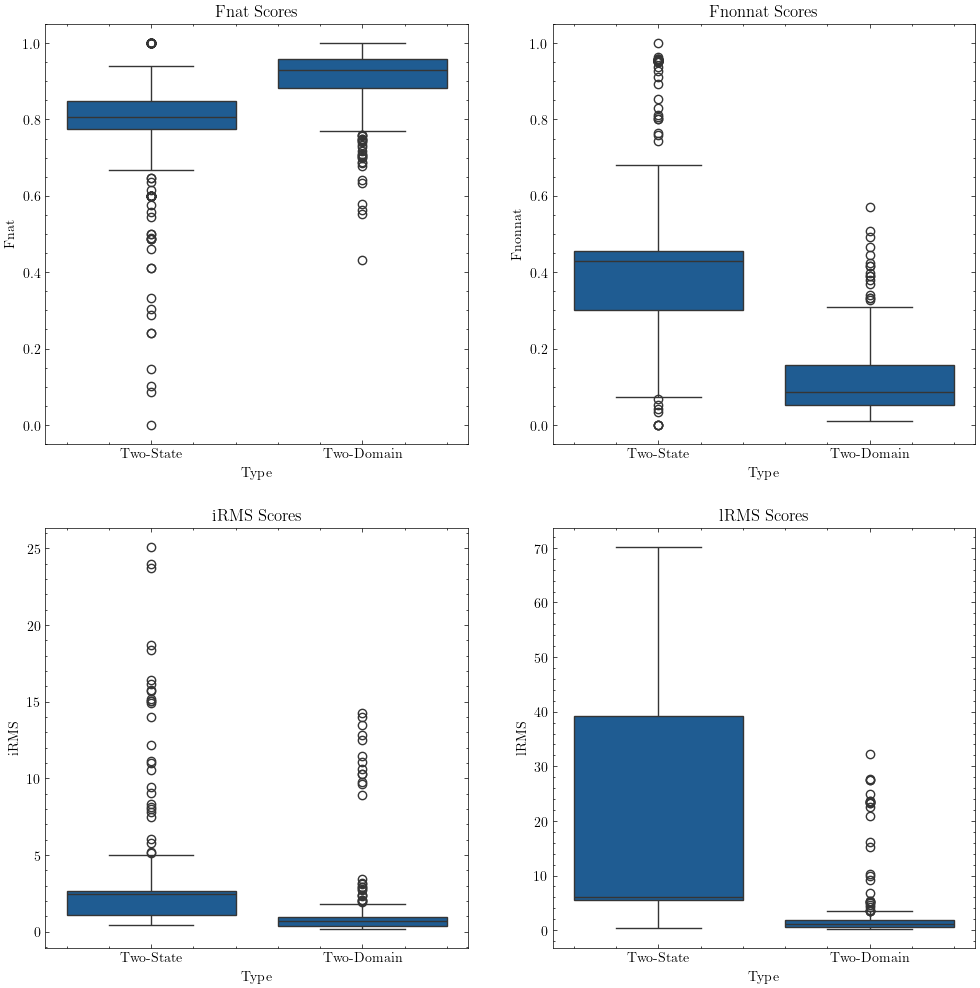

In [49]:
# Make boxplots of the four different scores
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Fnat
sns.boxplot(data=df2, x='type', y='fnat', ax=ax[0, 0])
ax[0, 0].set_title('Fnat Scores')
ax[0, 0].set_ylabel('Fnat')
ax[0, 0].set_xlabel('Type')

# Fnonnat
sns.boxplot(data=df2, x='type', y='fnonnat', ax=ax[0, 1])
ax[0, 1].set_title('Fnonnat Scores')
ax[0, 1].set_ylabel('Fnonnat')
ax[0, 1].set_xlabel('Type')

# iRMS
sns.boxplot(data=df2, x='type', y='irms', ax=ax[1, 0])
ax[1, 0].set_title('iRMS Scores')
ax[1, 0].set_ylabel('iRMS')
ax[1, 0].set_xlabel('Type')
# lRMS
sns.boxplot(data=df2, x='type', y='lrms', ax=ax[1, 1])
ax[1, 1].set_title('lRMS Scores')
ax[1, 1].set_ylabel('lRMS')
ax[1, 1].set_xlabel('Type')


# # Annotate statistical significance
# pairs = ['Autoinhibitory' 'Multi-Domain']
# order = ['Autoinhibitory', 'Multi-Domain']
# annotator = Annotator(ax[1, 1], pairs, data=df, x='type', y='lrms', order=order, hue='type')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/twoState_dockq_boxplots.png', dpi=300)

## Only Proteins with Annotated States

Here we want to look at the dockq scores only for proteins with annotated states

In [50]:
ai.head()

,uniprot,pdb,fnat,fnat_correct,fnat_total,fnonnat,fnonnat_nnative,fnonnat_model,irms,lrms,...,percent_region_1,percent_region_2,2_aligned,2_comp,state,conformation,organism,date,notes,type
0,P28482,4qp6,0.913,63,69,0.222,18,81,1.644,3.298,...,75.0,98.490566,1.387,3.309,Active,Closed,Homo sapiens,['2014-06-22'],NaN,Autoinhibitory
1,P62826,5uwh,1.0,5,5,0.286,2,7,1.03,40.342,...,86.842105,100.0,0.995,40.559,Active,Closed,Homo sapiens,['2017-02-21'],NaN,Autoinhibitory
3,P28482,6gjb,0.8,64,80,0.439,50,114,2.574,5.796,...,100.0,99.622642,1.198,6.652,Autoinhibited,Closed,Homo sapiens,['2018-05-16'],NaN,Autoinhibitory
4,P28482,7nr3,0.833,60,72,0.455,50,110,2.533,5.722,...,100.0,99.622642,1.229,6.646,Autoinhibited,Closed,Homo sapiens,['2021-03-02'],NaN,Autoinhibitory
5,P62826,7mo3,0.6,3,5,0.957,67,70,3.951,63.652,...,84.210526,99.375,4.591,62.371,Autoinhibited,Closed,Homo sapiens,['2021-05-01'],NaN,Autoinhibitory


In [51]:
ai_states = ai.dropna(subset=['state'])


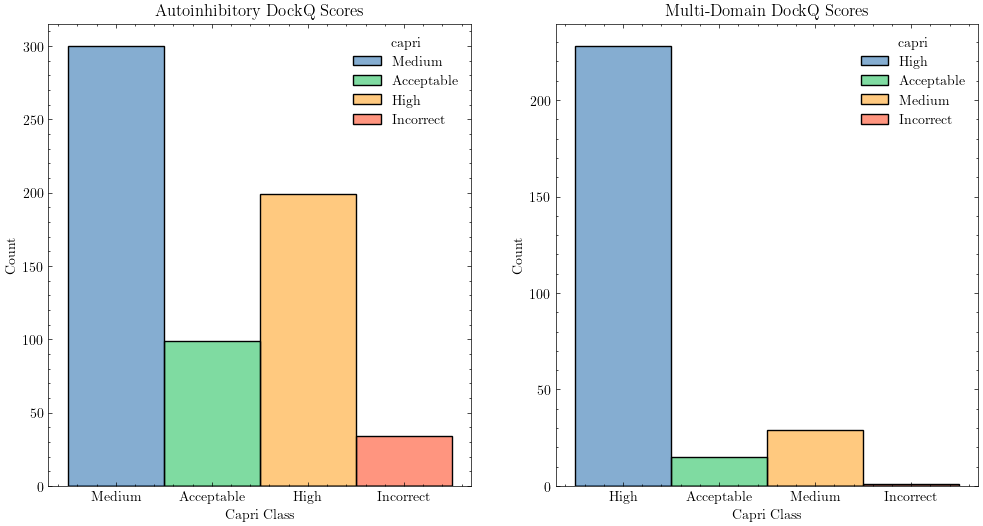

In [52]:
# Plot the closed DockQ scores

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(ai_states, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('Autoinhibitory DockQ Scores')
ax[0].set_xlabel('Capri Class')

sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')

plt.savefig('./project_pipeline/data/figures/states_dockq_histograms.png', dpi=300)

In [53]:
# Does changing multi-domain to only obligate change much?

# Get obligate proteins
si = pd.read_csv('./project_pipeline/data/sidhanta_domains.csv').astype('object')

oblist = si['uniprot'].unique()

# Subset dataframe
simd = md[md['uniprot'].isin(oblist)].reset_index(drop=True)

# Concatenate dataframes with classifications
d5 = pd.concat([ai, simd])

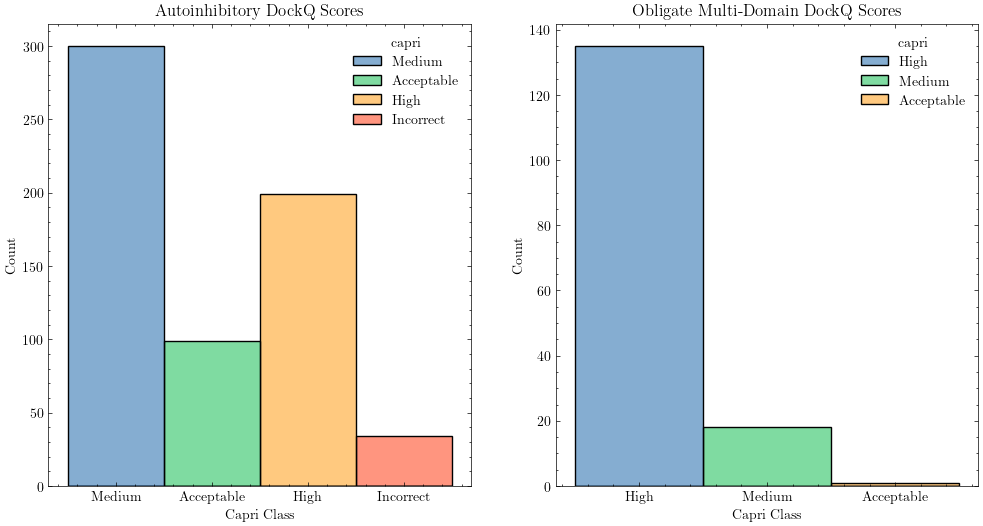

In [54]:
# Plot the autoinhibitory DockQ scores vs obligate

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(ai, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('Autoinhibitory DockQ Scores')
ax[0].set_xlabel('Capri Class')

sns.histplot(simd, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Obligate Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')

plt.savefig('./project_pipeline/data/figures/auto_obligate_dockq_histograms.png', dpi=300)

## Closed Two-State Autoinhibitory Proteins

Now we look at solely those strutures that are closed for two-state proteins

In [55]:
twoClosed = two[two['conformation'] == 'Closed']

# Concatenate dataframes with classifications
df4 = pd.concat([twoClosed, md])

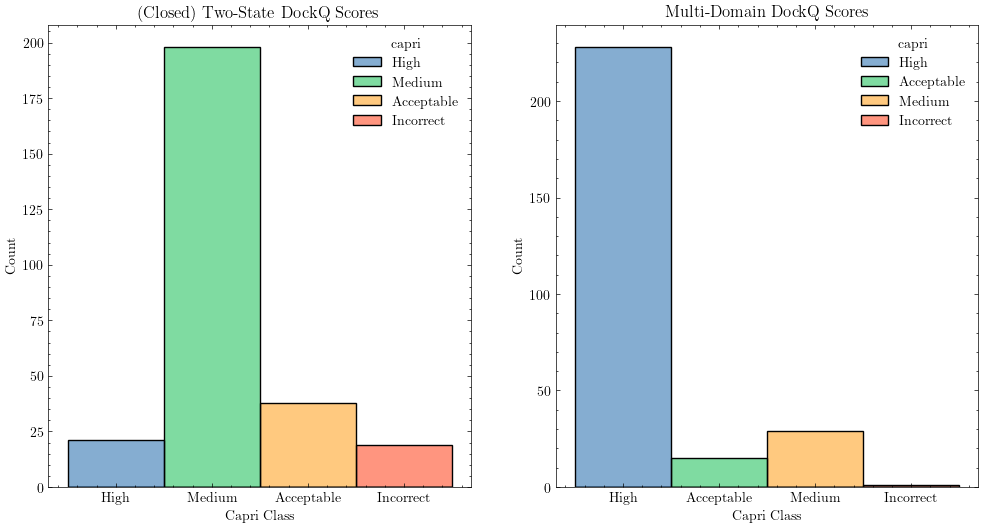

In [56]:
# Plot the closed Two-state DockQ scores

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(twoClosed, x='capri', hue='capri', ax=ax[0])
ax[0].set_title('(Closed) Two-State DockQ Scores')
ax[0].set_xlabel('Capri Class')

sns.histplot(md, x='capri', hue='capri', ax=ax[1])
ax[1].set_title('Multi-Domain DockQ Scores')
ax[1].set_xlabel('Capri Class')

plt.savefig('./project_pipeline/data/figures/twoState_closed_dockq_histograms.png', dpi=300)

## Putting them all in a single graph

We're going to put the closed two-state, closed autoinhibitory, and closed multi-domain in the same graph. (Except the multi-domain here is not closed. TODO: does it need to be closed?)

In [57]:
# Slightly modify the types
twoClosed['type'] = 'Two-State AI'
ai['type'] = 'All AI'

# Concatenate dataframes with classifications
df5 = pd.concat([twoClosed, ai, md]).reset_index(drop=True) # Change md to simd for obligate

sns.set_palette('Set2')


/tmp/ipykernel_1708034/428394439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoClosed['type'] = 'Two-State AI'


Adapting Alireza's code for his plot.

In [58]:
CAPRI_CLASSES = ['Incorrect', 'Acceptable', 'Medium', 'High']
order = ['All AI', 'Two-State AI', 'Multi-Domain']

In [59]:
# Function to calculate the luminance of a color
def get_luminance(color):
    # Convert color to RGB (assuming it's in hex format if it's a string)
    if isinstance(color, str):
        color = plt.colors.to_rgb(color)  # Converts hex to RGB if necessary
    # Calculate luminance using a formula that accounts for human eye sensitivity
    luminance = 0.299 * color[0] + 0.587 * color[1] + 0.114 * color[2]
    return luminance

def make_color_gradient(color1, color2, n):
    # Convert color to RGB (assuming it's in hex format if it's a string)
    if isinstance(color1, str):
        color1 = mcolors.to_rgb(color1)  # Converts hex to RGB if necessary
    if isinstance(color2, str):
        color2 = mcolors.to_rgb(color2)  # Converts hex to RGB if necessary
    # Create a color gradient
    gradient = [color1]
    for i in range(1, n):
        # Calculate the intermediate color
        new_color = [color1[j] + (color2[j] - color1[j]) * i / (n - 1) for j in range(3)]
        gradient.append(new_color + [1])
    return gradient

In [60]:
# Set colors
# Get the hex codes for the colors so we can assign them to categories
col = sns.color_palette('Set1')
print(col.as_hex())

col.as_hex()

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

In [61]:
# RG_DATASET_COLOR = 'dodgerblue'
ALL_AI_COLOR = '#4daf4a'
TWO_STATE_AI_COLOR = '#ff7f00'
MULTI_DOMAIN_COLOR = '#377eb8'
# SCANIDR_DATASET_COLOR = 'slateblue'
# DECOYS_DATASET_COLOR = 'darkgrey'

LIGHT_GREY = mcolors.to_rgba('lightgrey')
# CAPRI_COLORS_RG = [LIGHT_GREY] + make_color_gradient('white', RG_DATASET_COLOR, 5)[-4:]
CAPRI_COLORS_ALL_AI = [LIGHT_GREY] + make_color_gradient('white', ALL_AI_COLOR, 5)[-4:]
CAPRI_COLORS_TWO_STATE = [LIGHT_GREY] + make_color_gradient('white', TWO_STATE_AI_COLOR, 5)[-4:]
CAPRI_COLORS_MULTI_DOMAIN = [LIGHT_GREY] + make_color_gradient('white', MULTI_DOMAIN_COLOR, 5)[-4:]
# CAPRI_COLORS_SCANIDR = [LIGHT_GREY] + make_color_gradient('white', SCANIDR_DATASET_COLOR, 5)[-4:]

In [62]:
class MultipleRectanglesHandler(HandlerBase):
    def __init__(self, colors):
        self.colors = colors
        super().__init__()

    def create_artists(self, legend, orig_handle, x0, y0, width, height, fontsize, trans):
        # Create as many rectangles as there are colors
        rects = []
        for i, color in enumerate(self.colors):
            rect = Rectangle([x0 + (width / len(self.colors)) * i, y0], 
                                     width / len(self.colors), height, 
                                     facecolor=color, edgecolor=None, 
                                     transform=trans)
            rects.append(rect)
        return rects

<>:66: SyntaxWarning: invalid escape sequence '\%'
<>:66: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_1708034/3810385260.py:66: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel('\% Success')


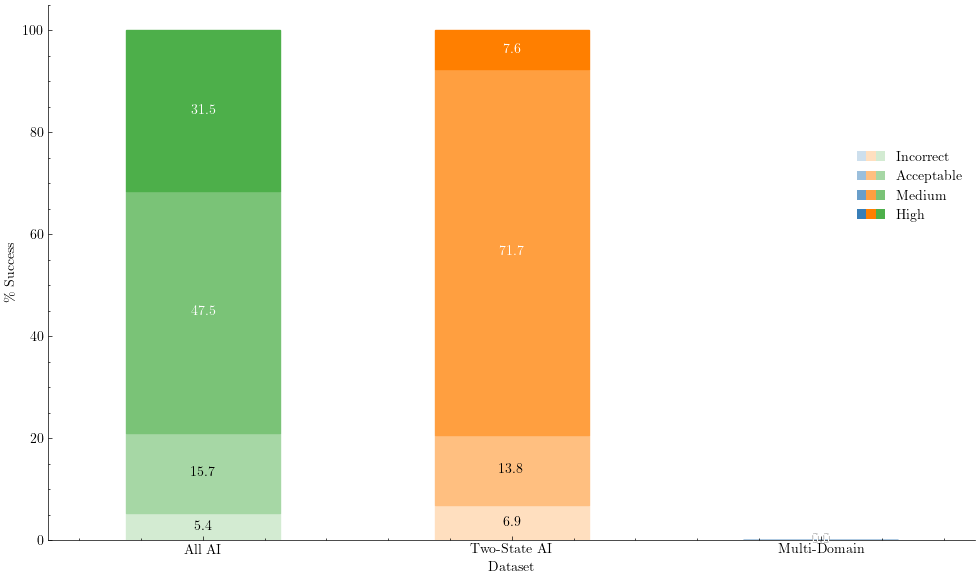

In [63]:
# Make a histplot of the three types

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
(df5
 .groupby('type')['capri']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    .pivot(index='type', columns='capri', values='percent')[CAPRI_CLASSES]
    .reindex(CAPRI_CLASSES, axis=1)
    .reindex(order, axis=0)
    .plot(kind='bar', stacked=True, rot=0, legend=False, ax=ax, width=0.5)
)

# set palettes
for i, bar in enumerate(plt.gca().patches):
    if i % len(order) == 0:
        bar.set_color(CAPRI_COLORS_ALL_AI[i//len(order)+1])
    if i % len(order) == 1:
        bar.set_color(CAPRI_COLORS_TWO_STATE[i//len(order)+1])
    if i % len(order) == 2:
        bar.set_color(CAPRI_COLORS_MULTI_DOMAIN[i//len(order)+1])
    # if i % len(order) == 3:
    #     bar.set_color(CAPRI_COLORS_RG[i//len(order)+1]) 
    # if i % len(order) == 4:
    #     bar.set_color(CAPRI_COLORS_SCANIDR[i//len(order)+1])

# text on top of bars with percentage
for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    color = 'white' if get_luminance(p.get_facecolor()) <= 0.7 else 'black'  # Choose color based on luminance
    plt.gca().annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center', color=color, fontsize=10)

# x_sum = {}
# for p in plt.gca().patches:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     x_sum[x] = x_sum.get(x, 0) + height
# for p in plt.gca().patches[-len(order):]:
#     width, height = p.get_width(), p.get_height()
#     x, y = p.get_xy()
#     plt.gca().annotate(f'{x_sum[x]:.1f}%', (x + width / 2, y + height+2), ha='center', va='bottom', color='k', fontsize=16)

# legend
high_handle = object()
medium_handle = object()
acceptable_handle = object()
incorrect_handle = object()
pals = [CAPRI_COLORS_MULTI_DOMAIN, CAPRI_COLORS_TWO_STATE, CAPRI_COLORS_ALL_AI] # CAPRI_COLORS_RG, CAPRI_COLORS_SCANIDR
ax.legend(
    title='',
    handles=[incorrect_handle, acceptable_handle, medium_handle, high_handle],
    handler_map={
        high_handle: MultipleRectanglesHandler([pal[4] for pal in pals]),
        medium_handle: MultipleRectanglesHandler([pal[3] for pal in pals]),
        acceptable_handle: MultipleRectanglesHandler([pal[2] for pal in pals]),
        incorrect_handle: MultipleRectanglesHandler([pal[1] for pal in pals]),
    },
    labels=['Incorrect', 'Acceptable', 'Medium', 'High'],
    bbox_to_anchor=(1, 0.75)
)

plt.xlabel('Dataset')
plt.ylabel('\% Success')
# plt.xticks([0, 1], ['Full IDP', 'Delimited IDP'])
plt.ylim(0, 105)

# Remove spines
ax.spines[['top', 'right']].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
    
plt.tight_layout()
plt.savefig('./project_pipeline/data/figures/capri_classifications.png', dpi=300)

## ColabFold DockQ Results

In [64]:
col = pd.read_csv('./project_pipeline/data/ai_cf_pdb_dockq_results.csv')
col['capri'] = pd.Categorical(col['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

Text(0.5, 0, 'Capri Class')

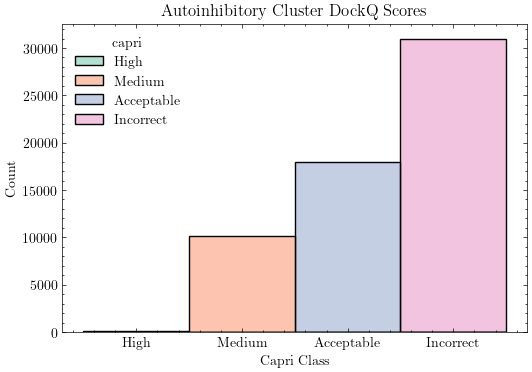

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(col, x='capri', hue='capri', ax=ax)
ax.set_title('Autoinhibitory Cluster DockQ Scores')
ax.set_xlabel('Capri Class')


In [66]:
md_cf = pd.read_csv('./project_pipeline/data/md_af_cf_dockq_results.csv')
md_cf['capri'] = pd.Categorical(md_cf['capri'], ['High', 'Medium', 'Acceptable', 'Incorrect'])

Text(0.5, 0, 'Capri Class')

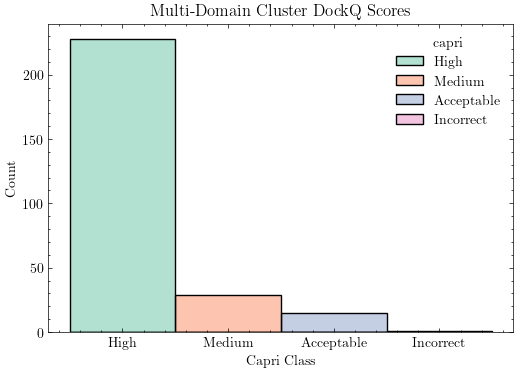

In [68]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.histplot(md_cf, x='capri', hue='capri', ax=ax)
ax.set_title('Multi-Domain Cluster DockQ Scores')
ax.set_xlabel('Capri Class')
